In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from citation_network import EntitiesCrawler, createCitationGraph
from igraph import plot

In [12]:
alexCrawler = EntitiesCrawler("")
filters = {
    "is_paratext" : "false",
    "language": "en",
    "open_access.is_oa": "true",
    "from_publication_date": "2017-01-01",
    "to_publication_date": "2017-01-01"
}

search = "Attention is all you need"
search_entities = alexCrawler.getEntities(filters, search)
search_graph = createCitationGraph(entities=search_entities)

NotImplementedError: Only supporting time tracking and error tracking

In [10]:
search_entities._api.profiler.get_summary()

{'total_time': 88.62901759147644,
 'api_calls': 46.0,
 'average_time': 1.9267177737277488}

Creating the citation graph: 27it [00:03, 10.29it/s]WARNING - [{'WID': 'W3105291472'}] Rate limit hit (HTTPS 429). Retrying in 2.0 seconds...


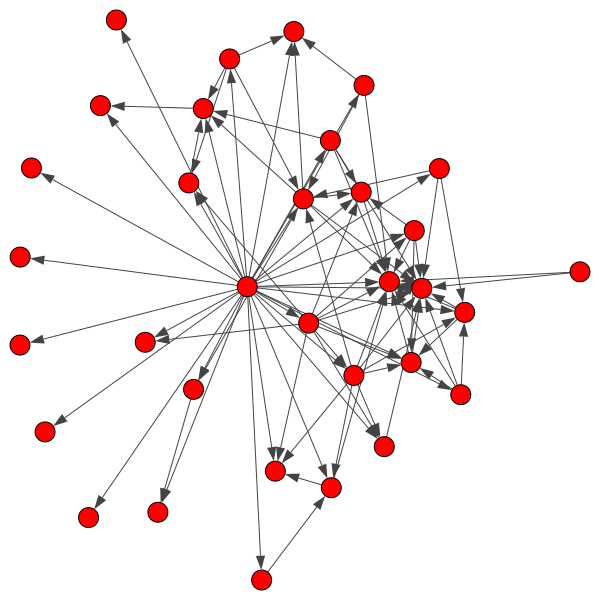

In [ ]:
iterator = crawler.citationBFS(["W3001111845"], maxLevels=2, maxNodes=1000)
g = createCitationGraph(iterator)
plot(g, bbox=(600, 600), margin=20)

In [3]:
from citation_network import save_citation_graph_to_csv, create_citation_graph_from_csv

In [4]:
save_citation_graph_to_csv("test.csv", g)

In [5]:
g_from_csv = create_citation_graph_from_csv("test.csv")

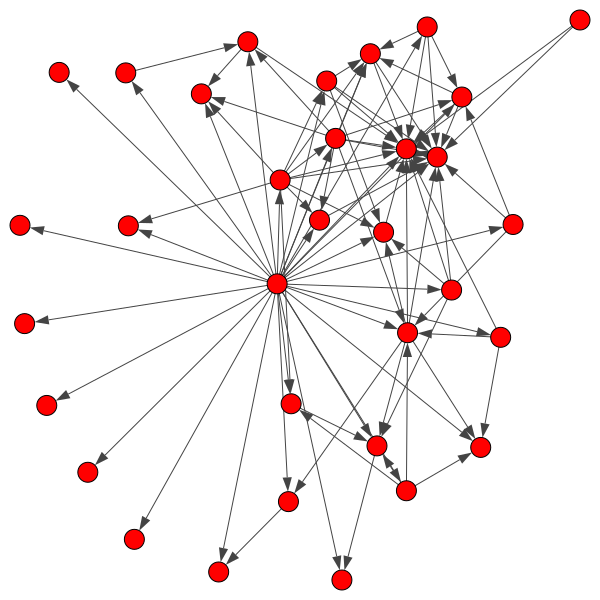

In [6]:
plot(g_from_csv, bbox=(600, 600), margin=20)